# PBH Coalescence Times
###### Code Writed by Tadeo D.
**References:** [arXiv:1807.11489](https://arxiv.org/pdf/1807.11489.pdf).

In [25]:
import numpy as np
import matplotlib.pyplot as pl
import matplotlib as mpl
import math
from scipy import constants
from tqdm import tqdm
from scipy.integrate import quad, dblquad
from astropy.cosmology import Planck18 as cosmo
from astropy import constants as const
import astropy.units as u
from units import unit
from astropy.cosmology import Planck18, z_at_value

In [26]:
H0 = cosmo.H(0)  #cosmo.H(0)  <Quantity 67.66 km / (Mpc s)>
#e = [0.5,  0.2,  0.1,  0.05,  0.01] #Excentricity array of datas
e = 0.1 #Half
a = [0.1] #Half Separation
#[0.001, 0.01, 0.1, 1, 7.63] #Separation in AU, the last one is 1pc = 208232 UA
omega_m = 0.321


def F(e): #Celoria's Equation (2.13) 
	F = (1-e**2)**(-3.5)*(1 + (73/24)*e**2 + (37/96)*e**4)
	return F

	
def t_coal(M1, M2, a, F): #Celoria's Equation (2.17)
	t = (5/256)*(const.c**5/const.G**3)*(((a*u.au).to(u.meter))**4 / (M1*M2*(M1 + M2)))*(1/F) #I did use a convertion AU to Meter to eliminate units from const.G
	return t #this variable has seconds units

def Rs(M): #Schwarzschild radius equation
    R = 2*const.G*M/(const.c**2)
    return R

def Z(D): #Redshift from Luminosity Distance
    z = (H0/const.c)*D
    return z

def integrand(z):
    omega_r = 8.070427106422706e-5 
    omega_m = 0.3
    omega_lmd = 0.7
    omega_k = 0
    return 1/((1+z)*((omega_r*((1+z)**4)) + 
                     (omega_m*((1+z)**3)) + 
                     (omega_lmd) + 
                     (omega_k*((1+z)**2)))**(1/2))


#def t_cosmic(z):
#    y = (1-omega_m)/(omega_m*(1+z))
#    g = omega_m/((1-omega_m)**(1.5))
#    h = (y*(1+y))**(0.5)
#    k = 1/math.sinh(y**(0.5))
#    t_c = (1/H0)*g*(h+k)
#    t_c = cosmo.age(0)*g*(h+k)
#    return t_c
#    return (t_c*(3.086e+19*u.km)/u.megaparsec).to(u.Gyr)

#(omega_m/(omega_m - 1)**(3/2))*[(1/np.sin(x**(1/2)))-[(x**(1/2)*(1-x)**1/2)]
#
    

In [29]:
f=open("LIST_EVENT_GW.txt", "r") ##https://www.gw-openscience.org/eventapi/html/
strings = [line.strip() for line in f]
f.close()
array = np.array(strings, dtype=np.str) 
sparr = np.char.split(strings)
#arrays where save datas and plot later
m_min = [] #Minimum mass
m_max = [] #Maxim mass
t_c = [] #Array Cosmic Time
t_array = [] #Coalesence Time
for i in range(len(sparr)):
    event = sparr[i]
    date = event[0]
    mass1=float(event[1])*const.M_sun
    mass2=float(event[2])*const.M_sun
    dist_lum=float(event[3])*u.megaparsec #distance luminocity 
    if mass1 > mass2: #Conditional sentece to choose the mass mini and mass max
        m_min.append(mass2/u.kg)
        m_max.append(mass1/u.kg)
    elif mass2 > mass1:
        m_min.append(mass1/u.kg)
        m_max.append(mass2/u.kg)
    print("LIGO Event:", event , "    Half Exectricity   e =",e)
    
    for j in a: #For each value of Separation
        time = t_coal(mass1, mass2,j,F(e))
        t_array.append(time.to(u.year)/u.year)#save each value of t_coal in t_array[]
        dl = dist_lum
        red_Z = Z(dl)*1000*(u.m/u.km)
        I, err = quad(integrand, 0, red_Z)#integral to get cosmic time
        t_c.append(I*cosmo.age(0)/u.Gyr)#save each value of integral from redshift to each event
        print("T_coal=", time.to(u.yr)) #convertion Seconds to Years
    print("Schwarzschild radius to M1, R =", (Rs(mass1).to(u.km)), "and M2, R =", (Rs(mass2).to(u.km)))
    print("Redshift=",red_Z)
    print("Cosmic Time=", I*cosmo.age(0))#comsmo.age(0) is 1/Ho constant into integral 
    print("\n")

LIGO Event: ['GWinvent', '35.6', '30.6', '430']     Half Exectricity   e = 0.1
T_coal= 417216025.1683972 yr
Schwarzschild radius to M1, R = 105.1357027091689 km and M2, R = 90.36945232866765 km
Redshift= 0.09704647072875996
Cosmic Time= 1.2489439344578672 Gyr


LIGO Event: ['GW190930', '12.3', '7.8', '780']     Half Exectricity   e = 0.1
T_coal= 15602515531.342081 yr
Schwarzschild radius to M1, R = 36.32497593603307 km and M2, R = 23.035350593581946 km
Redshift= 0.17603778411263435
Cosmic Time= 2.146709035595926 Gyr


LIGO Event: ['GW190929', '64.7', '25.7', '3680']     Half Exectricity   e = 0.1
T_coal= 200163349.87801224 yr
Schwarzschild radius to M1, R = 191.07527992368614 km and M2, R = 75.89852695577642 km
Redshift= 0.8305372378647364
Cosmic Time= 6.885015596419096 Gyr


LIGO Event: ['GW190924', '8.8', '5.0', '570']     Half Exectricity   e = 0.1
T_coal= 49551708391.87561 yr
Schwarzschild radius to M1, R = 25.9886006696822 km and M2, R = 14.76625038050125 km
Redshift= 0.1286429960

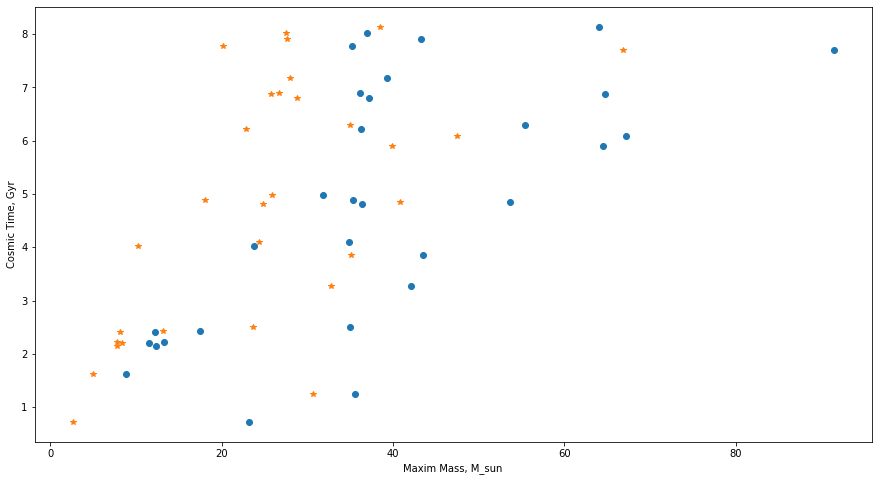

In [30]:
#t_array---> coalesence time
#t_c ----> cosmic time
#m_max
#m_min

pl.figure(figsize=(15,8))
pl.plot(m_max/const.M_sun, t_c,'o')
#pl.xlabel("Coalesence Time")
pl.xlabel("Maxim Mass, M_sun")
pl.ylabel("Cosmic Time, Gyr")
#pl.xscale("log")
#pl.yscale("log")
pl.plot(m_min/const.M_sun, t_c,'*')
#pl.xlabel("Minimum Mass, M_sun")
#pl.ylabel("Cosmic Time, Gyr")
pl.show()
